# 4.4 模型选择、欠拟合和过拟合
- **目录**
  - 4.4.1 训练误差和泛化误差
    - 4.4.1.1 统计学习理论
    - 4.4.1.2 模型复杂性
  - 4.4.2 模型选择
    - 4.4.2.1 验证集
    - 4.4.2.2 $K$折交叉验证
  - 4.4.3 欠拟合还是过拟合？
    - 4.4.3.1 模型复杂性
    - 4.4.3.2 数据集大小
  - 4.4.4 多项式回归
    - 4.4.4.1 生成数据集
    - 4.4.4.2 对模型进行训练和测试
    - 4.4.4.3 三阶多项式函数拟合(正常)
    - 4.4.4.4 线性函数拟合(欠拟合)
    - 4.4.4.5 高阶多项式函数拟合(过拟合)

- 作为机器学习科学家，我们的目标是发现能够**泛化的模式**，而不仅仅是记住数据。例如，在基因和痴呆症关系的任务中，由于基因唯一确定个体，模型可能会完全记住整个数据集。然而，我们希望模型能真正掌握泛化模式以便对未见过的患者进行有效预测。

- 更正式地说，我们的目标是发现某些模式，这些模式捕捉到了我们训练集潜在总体的规律。如果成功做到了这点，即使是对以前从未遇到过的个体，模型也可以成功地评估风险。如何发现可以泛化的模式是机器学习的根本问题。

- 真正的挑战在于，训练模型时只能访问有限数量的样本。在这种情况下，可能会出现过拟合现象，即模型在训练数据上表现良好，但在实际应用中泛化性能较差。为了解决过拟合问题，我们需要使用正则化技术。

- 将模型在训练数据上拟合的比在潜在分布中更接近的现象称为**过拟合（overfitting）**，用于对抗过拟合的技术称为**正则化（regularization）**，基本方法是简化模型。
- 其实在前面章节在Fashion-MNIST数据集上做实验时已经观察到了这种过拟合现象。在实验中调整模型架构或超参数时，你会发现：如果有足够多的神经元、层数和训练迭代周期，模型最终可以**在训练集上达到很高的精度**，但**测试集的准确性却下降**了。

## 4.4.1 训练误差和泛化误差

- **两个重要概念**
  - 为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。
**训练误差**（training error）是指，模型在训练数据集上计算得到的误差。
**泛化误差**（generalization error）是指，模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

- **一个重要原理**。
  - 问题是，我们**永远不能准确地计算出泛化误差**。
这是因为无限多的数据样本是一个虚构的对象。
在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差，
该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

- **三个思维实验**
  - 假设一个大学生正在努力准备期末考试。
一个勤奋的学生会努力做好练习，并利用往年的考试题目来测试自己的能力。
尽管如此，在过去的考试题目上取得好成绩并不能保证他会在真正考试时发挥出色。
例如，学生可能试图通过死记硬背考题的答案来做准备。
他甚至可以完全记住过去考试的答案。
另一名学生可能会通过试图理解给出某些答案的原因来做准备。
在大多数情况下，后者会考得更好。

  - 类似地，考虑一个简单地使用查表法来回答问题的模型。如果允许的输入集合是离散的并且相当小，那么也许在查看许多训练样本后，该方法将执行得很好。但当这个模型面对从未见过的例子时，它表现的可能比随机猜测好不到哪去。这是因为输入空间太大了，远远不可能记住每一个可能的输入所对应的答案。例如，考虑$28\times28$的灰度图像。如果每个像素可以取$256$个灰度值中的一个，则有$256^{784}$个可能的图像。这意味着指甲大小的低分辨率灰度图像的数量比宇宙中的原子要多得多。即使我们可能遇到这样的数据，我们也不可能存储整个查找表。

  - 最后，考虑对掷硬币的结果（类别0：正面，类别1：反面）进行分类的问题。假设硬币是公平的，无论我们想出什么算法，泛化误差始终是$\frac{1}{2}$。然而，对于大多数算法，我们应该期望训练误差会更低（取决于运气）。考虑数据集{0，1，1，1，0，1}。我们的算法不需要额外的特征，将倾向于总是预测*多数类*，从我们有限的样本来看，它似乎是1占主流。在这种情况下，总是预测类1的模型将产生$\frac{1}{3}$的误差，这比我们的泛化误差要好得多。当我们逐渐增加数据量，正面比例明显偏离$\frac{1}{2}$的可能性将会降低，我们的训练误差将与泛化误差相匹配。

- **要点：**
  - 训练误差：模型在训练数据集上的误差。
  - 泛化误差：模型在无限多数据样本上的误差期望。
  - 通过独立测试集估计泛化误差。
  - 思维实验1：学生准备考试，理解原因比死记硬背效果更好。
  - 思维实验2：查表法在大输入空间时泛化能力较差。
  - 思维实验3：掷硬币分类问题，训练误差可能低于泛化误差。
  - 增加数据量可使训练误差更接近泛化误差。

### 4.4.1.1 统计学习理论

- 泛化是机器学习中的基本问题。
- **独立同分布的假设**
  - 在我们目前已探讨、并将在之后继续探讨的监督学习情景中，
我们假设训练数据和测试数据都是从相同的分布中独立提取的。
这通常被称为**独立同分布假设（i.i.d. assumption）**，
这意味着对数据进行采样的过程没有进行“记忆”。
换句话说，抽取的第2个样本和第3个样本的相关性，
并不比抽取的第2个样本和第200万个样本的相关性更强。

  - 但是**此假设并不总是被遵守**，即很容易找出假设失效的情况。如果我们根据从加州大学旧金山分校医学中心的患者数据训练死亡风险预测模型，并将其应用于马萨诸塞州综合医院的患者数据，结果会怎么样？这两个数据的分布可能不完全一样。此外，抽样过程可能与时间有关。比如当我们对微博的主题进行分类时，新闻周期会使得正在讨论的话题产生时间依赖性，从而违反独立性假设。

  - 有时候我们即使**轻微违背独立同分布假设**，模型仍将继续运行得非常好。比如，我们有许多有用的工具已经应用于现实，如人脸识别、语音识别和语言翻译。毕竟，**几乎所有现实的应用都至少涉及到一些违背独立同分布假设的情况**。
  - 有些违背独立同分布假设的行为肯定会**带来麻烦**。比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统，然后想要用它来监测疗养院中的老人。这不太可能有效，因为大学生看起来往往与老年人有很大的不同。

  - 目前，即使认为独立同分布假设是理所当然的，理解泛化性也是一个困难的问题。此外，能够解释深层神经网络泛化性能的理论基础仍是一个难题。

- 但是如果模型执行地“太好了”，而不能对看不见的数据做到很好泛化，就会导致过拟合，这种情况需避免或控制。深度学习中有许多**启发式技术**旨在防止过拟合。

- **要点：**
  - 独立同分布假设（i.i.d. assumption）：训练数据和测试数据来自相同的分布，且独立提取。
  - 独立同分布假设并非总是成立，例如不同医院的患者数据或具有时间依赖性的微博话题。
  - 轻微违反独立同分布假设时，模型仍可能运行良好，如人脸识别、语音识别和语言翻译等应用。
  - 严重违反独立同分布假设可能导致问题，例如用大学生人脸数据训练的模型在疗养院老人中表现不佳。
  - 理解泛化性能本身是一个困难的问题，深层神经网络泛化性能的理论基础尚不完善。
  - 过拟合：模型在训练数据上表现过于优秀，但泛化到未见过的数据时性能较差。需要避免或控制过拟合现象。
  - 许多**启发式技术**旨在防止过拟合。

### 4.4.1.2 模型复杂性

当我们有简单的模型和大量的数据时，我们<b>期望泛化误差与训练误差相近</b>。
当我们有<b>更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大</b>。
模型复杂性由什么构成是一个复杂的问题。
一个模型是否能很好地泛化取决于很多因素。
例如，具有更多参数的模型可能被认为更复杂，
参数有更大取值范围的模型可能更为复杂。
通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂，
而需要“早停”（early stopping）的模型（即较少训练迭代周期）就不那么复杂。

<font color='red'>(用通俗的话讲，过拟合就是过于关注和抓住了训练数据的细节而忽视总体趋势和模式，那么在测试数据上误差就会很大，导致泛化性能极差)</font>，因为训练数据这些细节很有可能是由噪声数据导致的。

我们很难比较本质上不同大类的模型之间（例如，决策树与神经网络）的复杂性。
就目前而言，一条简单的经验法则相当有用：
统计学家认为，**能够轻松解释任意事实的模型是复杂的，
而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。**
在哲学上，这与波普尔的科学理论的可证伪性标准密切相关：
如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。
这一点很重要，因为所有的统计估计都是**事后归纳**。
也就是说，在观察事实之后进行估计，更容易受到相关谬误的影响。

- **要点：**
  - 简单模型和大量数据时，泛化误差与训练误差相近；复杂模型和较少样本时，训练误差降低，但泛化误差可能增大。
  - 模型复杂性由多种因素构成，例如参数数量、参数取值范围、训练迭代次数等。
  - 过拟合：过于关注训练数据细节，忽视总体趋势和模式，导致在测试数据上误差大，泛化性能差。
  - 难以比较不同大类模型（如决策树与神经网络）的复杂性。
  - 经验法则：能轻松解释任意事实的模型被认为复杂，表达能力有限但仍能很好地解释数据的模型可能更实用。
  - 波普尔的可证伪性标准：如果一个理论能拟合数据且具有可以证明其错误的具体测试，则认为它是好的。这与统计学中模型选择和泛化相关。
  - 统计估计是事后归纳，容易受到相关谬误影响。

- **影响模型泛化的因素：**

  - 可调整参数的数量。当可调整参数的数量（有时称为**自由度**）很大时，模型往往更容易过拟合。
  - 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
  - 训练样本的数量。即使你的模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。（注：简单点讲就是：模型复杂，训练样本少，就很容易过拟合！）

## 4.4.2 模型选择

- 在机器学习中，通常在评估几个候选模型后选择最终的模型。这个过程叫做**模型选择**。
- 分不同情况：
  - 有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。
  - 有时需要<b>比较不同的超参数设置下的同一类模型</b>(深度学习可能更关注这方面)。例如，训练多层感知机模型时，我们可能希望比较具有不同数量的隐藏层、不同数量的隐藏单元以及不同的的激活函数组合的模型。
- 为了<b>确定候选模型中的最佳模型，我们通常会使用验证集</b>。

### 4.4.2.1 验证集

原则上，在我们确定所有的超参数之前，我们不希望用到测试集。
**如果我们在模型选择过程中使用测试数据，可能会有过拟合测试数据的风险，那就麻烦大了。
如果我们过拟合了训练数据，还可以在测试数据上的评估来判断过拟合。**
但是如果我们过拟合了测试数据，我们又该怎么知道呢？

因此，我们决不能依靠测试数据进行模型选择。
然而，我们也不能仅仅依靠训练数据来选择模型，因为我们无法估计训练数据的泛化误差。

在实际应用中，情况变得更加复杂。
虽然理想情况下我们只会使用测试数据一次，
以评估最好的模型或比较一些模型效果，但现实是测试数据很少在使用一次后被丢弃。
我们很少能有充足的数据来对每一轮实验采用全新测试集。

解决此问题的常见做法是将我们的数据分成三份，
除了训练和测试数据集之外，还增加一个**验证数据集（validation dataset）**，
也叫**验证集（validation set）**。
但现实是验证数据和测试数据之间的边界模糊得令人担忧。
除非另有明确说明，否则在这本书的实验中，
我们实际上是在使用应该被正确地称为训练数据和验证数据的数据集，
并没有真正的测试数据集。
<font color='red'>(注：可以这样理解，验证集主要用于验证超参数，避免过拟合；而测试集用于测试整个模型，包括模型选择是否可行，优化算法是否有效等)。</font>


因此，书中每次实验报告的准确度都是验证集准确度，而不是测试集准确度。

- **要点：**
  - 在确定超参数之前，不应使用测试集，以避免过拟合测试数据的风险。
  - 不能仅依靠训练数据进行模型选择，因为无法估计其泛化误差。
  - 实际应用中，理想情况下测试数据只使用一次，但现实中测试数据很少在使用一次后被丢弃。
  - 解决方法：将数据分成三份，包括训练集、验证集和测试集。
  - 验证集用于验证超参数，避免过拟合；测试集用于测试整个模型（如模型选择是否可行，优化算法是否有效等）。
  - 验证数据和测试数据之间的边界可能模糊，需要明确区分。
  - 本书中实验报告的准确度实际上是验证集准确度，而非测试集准确度。

### 4.4.2.2 $K$折交叉验证

- 在可能无法提供足够的数据来构成一个合适的验证集时，解决方案是采用$K$**折交叉验证**。
- 将原始训练数据被分成$K$个不重叠的子集。
- 然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
- 最后，**通过对$K$次实验的结果取平均来估计训练和验证误差。**

## 4.4.3 欠拟合还是过拟合？

当我们比较训练和验证误差时，我们要注意两种常见的情况。
首先，我们要注意这样的情况：**训练误差和验证误差都很严重**，
但它们之间仅有一点差距。
如果模型不能降低训练误差，这可能意味着模型**过于简单（即表达能力不足）** ，
**无法捕获试图学习的模式**。
此外，由于我们的训练和验证误差之间的**泛化误差**很小，
我们有理由相信可以用一个更复杂的模型降低训练误差。
这种现象被称为**欠拟合（underfitting）**。

另一方面，当我们的训练误差明显低于验证误差时要小心（<font color='red'>注：训练误差小，说明在训练集上表现非常好；验证误差大，说明在验证集上表现差，这就是**过拟合**的典型表现</font>），
这表明严重的**过拟合（overfitting）**。
注意，过拟合并不总是一件坏事。特别是**在深度学习领域，最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多**。
最终，我们**通常更关心验证误差**，而不是训练误差和验证误差之间的差距。

是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小，这两个点将在下面进行讨论。

- **要点：**
  - 比较训练误差和验证误差时，需关注两种情况：欠拟合和过拟合。
  - 欠拟合：训练误差和验证误差都很严重，但差距小。可能原因是模型过于简单，表达能力不足。
  - 过拟合：训练误差明显低于验证误差，表明在训练集上表现好，但在验证集上表现差。
  - 过拟合并非总是坏事，在深度学习领域，最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。
  - 通常更关心验证误差，而非训练误差和验证误差之间的差距。
  - 是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小。

### 4.4.3.1 模型复杂性

为了说明一些关于过拟合和模型复杂性的经典直觉，
我们给出一个多项式的例子。
给定由单个特征$x$和对应实数标签$y$组成的训练数据，
我们试图找到下面的$d$阶多项式来估计标签$y$。

$$\hat{y}= \sum_{i=0}^d x^i w_i. \tag{4.4.1}$$

这只是一个线性回归问题，我们的特征是$x$的幂给出的，
模型的权重是$w_i$给出的，偏置是$w_0$给出的
（因为对于所有的$x$都有$x^0 = 1$）。
由于这只是一个线性回归问题，我们可以使用平方误差作为我们的损失函数。

高阶多项式函数比低阶多项式函数复杂得多。
高阶多项式的参数较多，模型函数的选择范围较广。
因此在固定训练数据集的情况下，
高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。
事实上，**当数据样本包含了$x$的不同值时，
函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。**
下图直观地描述了多项式的阶数和欠拟合与过拟合之间的关系：

<center>
    <img src="../img/capacity-vs-error.svg" alt="模型复杂度对欠拟合和过拟合的影响">
</center>
<center>图4.4.1 模型复杂度对欠拟合和过拟合的影响</center>



- **要点：**
  - 以多项式为例，说明过拟合和模型复杂性的经典直觉。
  - 给定单个特征$x$对应实数标签$y$组成的训练数据，寻找$d$阶多项式来估计标签$y$。
  - 多项式问题可转化为线性回归问题，使用平方误差作为损失函数。
  - 高阶多项式函数比低阶多项式更复杂，参数较多，选择范围较广。
  - 在固定训练数据集情况下，高阶多项式相对于低阶多项式的训练误差通常更低。
  - 当数据样本包含不同值时，函数阶数等于数据样本数量的多项式可以完美拟合训练集。
  - 多项式的阶数与欠拟合与过拟合之间存在关系，

### 4.4.3.2 数据集大小
- 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。随着训练数据量的增加，泛化误差通常会减小。
- 一般来说，更多的数据不会有什么坏处。
- 对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。
给出更多的数据，我们可能会尝试拟合一个更复杂的模型。
能够拟合更复杂的模型可能是有益的。
- 如果没有足够的数据，简单的模型可能更有用。
- 对于许多任务，深度学习只有在有**数千个训练样本**时才优于线性模型。
- 深度学习目前的大火要归功于**廉价存储**、**互联设备**以及数字化经济带来的**海量数据集**。

## 4.4.4 多项式回归

- 现在通过多项式拟合来探索这些概念。

In [1]:
%matplotlib inline
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 4.4.4.1 生成数据集

- 给定$x$，使用以下<font color='red'>三阶多项式</font>来生成训练和测试数据的标签：
$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2). \tag{4.4.2}$$
  噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。
- 在优化的过程中，通常希望**避免非常大的梯度值或损失值**。
  - 将特征从$x^i$调整为$\frac{x^i}{i!}$的原因，
这样可以避免很大的$i$带来的特别大的指数值。
- 为训练集和测试集各生成100个样本。


In [2]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
## true_w维度是(20)，但只有前4个被赋值了，后面16个值为0
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)

## 求幂运算
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!

# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
## 加上噪声，后16列数据全部是噪声
labels += np.random.normal(scale=0.1, size=labels.shape)

--------------

In [3]:
labels.shape

(200,)

In [4]:
##features的形状
features.shape

(200, 1)

In [5]:
##真实权重w的值
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [6]:
##各数据的形状：标签、多项式特征、特征@权重，权重
labels.shape,poly_features.shape,(poly_features@true_w).shape,true_w.shape

((200,), (200, 20), (200,), (20,))

In [7]:
##用向量求向量的指数值，底数形状：(m,1)；指数的形状：(1,n)，最后的形状则变成(m,n)
p=np.power(np.array([2,3,4]).reshape(3,1),np.array([0,1,2,3]).reshape(1,-1))
p, p.shape

(array([[ 1,  2,  4,  8],
        [ 1,  3,  9, 27],
        [ 1,  4, 16, 64]]),
 (3, 4))

In [8]:
a = np.array([[1,2,3]]).T
b = np.array([[4,5,6,7]])
a,b,a@b

(array([[1],
        [2],
        [3]]),
 array([[4, 5, 6, 7]]),
 array([[ 4,  5,  6,  7],
        [ 8, 10, 12, 14],
        [12, 15, 18, 21]]))

-----------------
- **说明：线性回归中的设计矩阵**
  - 在线性回归分析中，如果将常量项（截距）作为一个系数一起参与参数估计，自变量矩阵通常称为**设计矩阵**（design matrix）。
  - 设计矩阵的首列通常为全1列，以便与截距项相乘。
  - 具体来说，如果有 $ n $ 个观测值和 $ p $ 个自变量（不包括截距项），设计矩阵 $ X $ 的维度将是 $ n \times (p + 1) $，其中：
    - 第一列是全1列，用于截距项。
    - 其余列是各个自变量的观测值。
  - 例如，对于一个有3个观测值和2个自变量的线性回归模型，设计矩阵 $ X $ 可以表示为：
$$
X = \begin{pmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
1 & x_{31} & x_{32}
\end{pmatrix}
$$
  - 这种设计矩阵形式使得线性回归模型可以统一地表示为：
$$
\mathbf{y} = X \mathbf{\beta} + \mathbf{\epsilon}
$$
    - 其中，$ \mathbf{y} $ 是响应变量向量，$ \mathbf{\beta} $ 是包含截距和斜率在内的回归系数向量， $ \mathbf{\epsilon} $ 是误差项向量。

---------------

- 存储在`poly_features`中的单项式由gamma函数重新缩放，
其中$\Gamma(n)=(n-1)!$。
- 从生成的数据集中查看前2个样本，
第一个值是与偏置相对应的常量特征。


In [9]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

In [10]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.5110],
         [-1.2948]]),
 tensor([[ 1.0000e+00,  5.1105e-01,  1.3058e-01,  2.2245e-02,  2.8420e-03,
           2.9048e-04,  2.4742e-05,  1.8063e-06,  1.1539e-07,  6.5521e-09,
           3.3484e-10,  1.5556e-11,  6.6250e-13,  2.6044e-14,  9.5069e-16,
           3.2390e-17,  1.0345e-18,  3.1100e-20,  8.8297e-22,  2.3749e-23],
         [ 1.0000e+00, -1.2948e+00,  8.3831e-01, -3.6183e-01,  1.1713e-01,
          -3.0333e-02,  6.5460e-03, -1.2109e-03,  1.9599e-04, -2.8197e-05,
           3.6511e-06, -4.2978e-07,  4.6375e-08, -4.6191e-09,  4.2721e-10,
          -3.6879e-11,  2.9845e-12, -2.2732e-13,  1.6353e-14, -1.1144e-15]]),
 tensor([ 5.2269, -1.3909]))

### 4.4.4.2 对模型进行训练和测试

- 首先实现一个函数来评估模型在给定数据集上的损失。


In [11]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

- **定义训练函数**。


In [12]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    ## 最后一个维度代表特征数
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    ## 批量大小设置为10，如果训练数据不足10条，则等于训练数据条数
    batch_size = min(10, train_labels.shape[0])
    ## 生成训练数据与测试数据的批量迭代器
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())
    print('train loss', evaluate_loss(net, train_iter, loss))
    print('test loss', evaluate_loss(net, test_iter, loss))

### 4.4.4.3 三阶多项式函数拟合(正常)
- 首先使用三阶多项式函数，它与数据生成函数的阶数相同。
- 结果表明，该模型能有效降低训练损失和测试损失。
- 学习到的模型参数也接近真实值$w = [5, 1.2, -3.4, 5.6]$。


weight: [[ 4.9581833  1.3099316 -3.3005106  5.234024 ]]
train loss 0.015227755904197693
test loss 0.03590069636702538


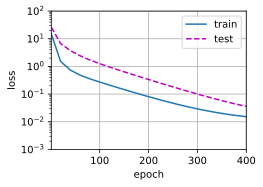

In [14]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 4.4.4.4 线性函数拟合(欠拟合)

- 再看线性函数拟合，减少该模型的训练损失相对困难。
- 在最后一个迭代周期完成后，**训练损失仍然很高**。
- 说明当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。


weight: [[3.5316038 2.8629434]]
train loss 2.5760762214660646
test loss 11.93754098892212


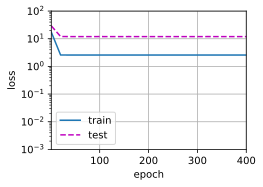

In [15]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 4.4.4.5 高阶多项式函数拟合(过拟合)

- 尝试使用一个阶数过高的多项式来训练模型。
- 没有足够的数据用于学到高阶系数，这些高阶系数应该具有接近于零的值。
- 这个过于复杂的模型会轻易受到训练数据中噪声的影响。
- 虽然训练损失可以有效地降低，但测试损失仍然很高。
- 结果表明，复杂模型对数据造成了过拟合。


weight: [[ 4.9871655   1.2316167  -3.3538854   5.303185   -0.15469868  1.2670726
  -0.04814098 -0.07636427  0.20182529 -0.02991172  0.04573149 -0.15639752
   0.0452417   0.15121445  0.21918295  0.0331937  -0.16235954 -0.02599633
   0.08490518  0.09161782]]
train loss 0.010171995721757412
test loss 0.02009262803941965


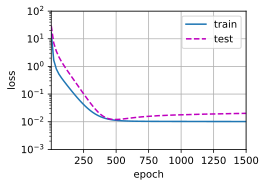

In [16]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

- 在接下来的章节中，我们将继续讨论过拟合问题和处理这些问题的方法，例如权重衰减和dropout。

## 小结

* 欠拟合是指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差。
* 由于不能基于训练误差来估计泛化误差，因此简单地最小化训练误差并不一定意味着泛化误差的减小。机器学习模型需要注意防止过拟合，即防止泛化误差过大。
* 验证集可以用于模型选择，但不能过于随意地使用它。
* 我们应该选择一个复杂度适当的模型，避免使用数量不足的训练样本。